<a href="https://colab.research.google.com/github/mardmikon/-Intelligent-systems-and-technologies/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_11_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 11-12**

In [3]:
pip install fuzzy-c-means

     |████████████████████████████████| 10.1 MB 7.2 MB/s 
     |████████████████████████████████| 15.7 MB 113 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# **Выполнить кластеризацию своего набора данных, считая, что метки кластеров неизвестны. Сравнить результаты кластеризации (метки кластеров и реальные метки классов).**

In [6]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from fcmeans import FCM
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

headers = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive",
                "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font",
                "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data",
                "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
                "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest","capital_run_length_total"]

dataset = pd.read_csv('spambase.data', names=headers)
datasetWithoutClasterLabels = pd.DataFrame(dataset.iloc[:,1:-1])
labels = list(dataset.iloc[:,-1])

Исходные метки кластеров:

In [7]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

**Применение алгоритма k-means**

In [8]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=100).fit(datasetWithoutClasterLabels)

Метки, полученные в результате работы k-means

In [9]:
for label in kmeans.labels_:
  print(label)

1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
0
1
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
0
0
1
1
0
1
1
0
0
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
1
0
0
1
1
1
1
1
0
0


**Визуализация результатов кластеризации с иходными метками кластеров**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Data T-SNE projection')]

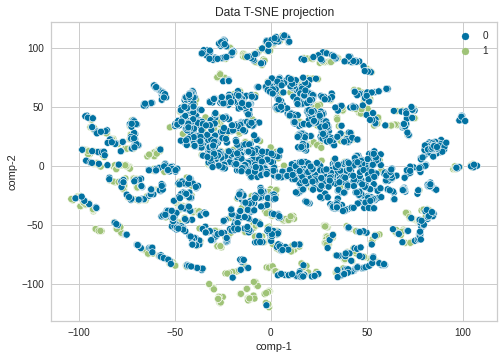

In [10]:
tsne = TSNE(init='random', perplexity=10).fit_transform(dataset.iloc[:,1:-1])
df = pd.DataFrame()
df["y"] = dataset.iloc[:,-1]
df["comp-1"] = tsne[:,0]
df["comp-2"] = tsne[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                data=df).set(title="Data T-SNE projection") 

**Визуализация результатов кластеризации с метками кластеров, полученными в результате работы алгоритма k-means**

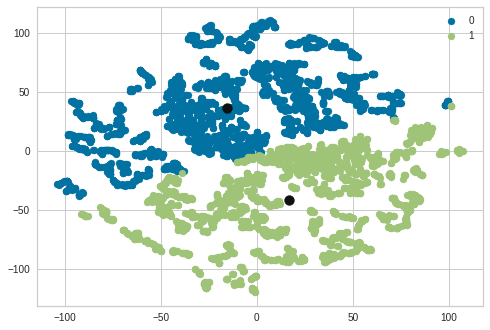

In [11]:
kmeansLabels = kmeans.fit_predict(tsne)

uniqueLabels = np.unique(labels)
 
for i in uniqueLabels:
    plt.scatter(tsne[kmeansLabels == i , 0] , tsne[kmeansLabels == i , 1] , label = i)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

**Определение оптимального числа кластеров с помощью оценки силуэта**

Оценка методом плеча работу алгоритма k-means: количество кластеров 2 = 0.8475511103950265
Оценка методом плеча работу алгоритма k-means: количество кластеров 3 = 0.8254689318856946
Оценка методом плеча работу алгоритма k-means: количество кластеров 4 = 0.7727739457485798
Оценка методом плеча работу алгоритма k-means: количество кластеров 5 = 0.7037830694472837
Оценка методом плеча работу алгоритма k-means: количество кластеров 6 = 0.7039331162029006
Оценка методом плеча работу алгоритма k-means: количество кластеров 7 = 0.7039858133873446
Оценка методом плеча работу алгоритма k-means: количество кластеров 8 = 0.6698575186988628
Оценка методом плеча работу алгоритма k-means: количество кластеров 9 = 0.6799787600161562
Оценка методом плеча работу алгоритма k-means: количество кластеров 10 = 0.6108161181631963


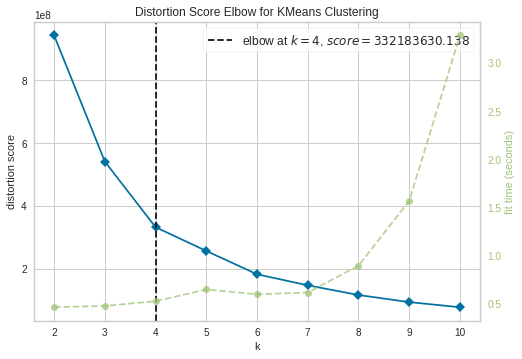

In [28]:
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=100).fit(datasetWithoutClasterLabels)
    print(f"Оценка методом плеча работу алгоритма k-means: количество кластеров {k} = {silhouette_score(datasetWithoutClasterLabels, kmeans.labels_)}")
visualizer = KElbowVisualizer(KMeans(), k=(2,11))
visualizer.fit(datasetWithoutClasterLabels)
visualizer.show()

Итог: оптимальное число кластеров для k-means - 4

**Применение алгоритма fcm**

In [17]:
fcm = FCM(n_clusters=2, random_state=100)
fcm.fit(np.array(datasetWithoutClasterLabels))


Метки, полученные в результате работы fcm

In [18]:

for label in fcm.predict(np.array(datasetWithoutClasterLabels)):
  print(label)

1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
0
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
0
0
1
1
0
1
1
0
0
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
1
0
0
1
1
1
1
1
0
0


**Визуализация результатов кластеризации с метками кластеров, полученными в результате работы алгоритма fcm**

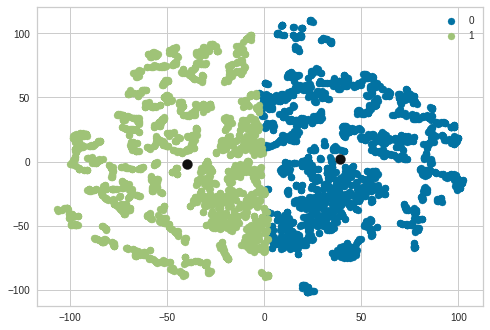

In [ ]:
fcm = FCM(n_clusters=2)
fcm.fit(tsne)
fcmLabels = fcm.predict(tsne)
uniqueLabels = np.unique(fcmLabels)

for i in uniqueLabels:
    plt.scatter(tsne[fcmLabels == i , 0] , tsne[fcmLabels == i , 1] , label = i)
centroids = fcm.centers
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

Оценка методом плеча работу алгоритма fcm: количество кластеров 2 = 0.8326625438689401
Оценка методом плеча работу алгоритма fcm: количество кластеров 3 = 0.7682512186117145
Оценка методом плеча работу алгоритма fcm: количество кластеров 4 = 0.7037778145518195
Оценка методом плеча работу алгоритма fcm: количество кластеров 5 = 0.669249780736419
Оценка методом плеча работу алгоритма fcm: количество кластеров 6 = 0.6631457710529963
Оценка методом плеча работу алгоритма fcm: количество кластеров 7 = 0.5900478888609862
Оценка методом плеча работу алгоритма fcm: количество кластеров 8 = 0.589357818762742
Оценка методом плеча работу алгоритма fcm: количество кластеров 9 = 0.5349281841090168
Оценка методом плеча работу алгоритма fcm: количество кластеров 10 = 0.5388101297525038


Text(0.5, 1.0, 'Distortion Score for FCM Clustering')

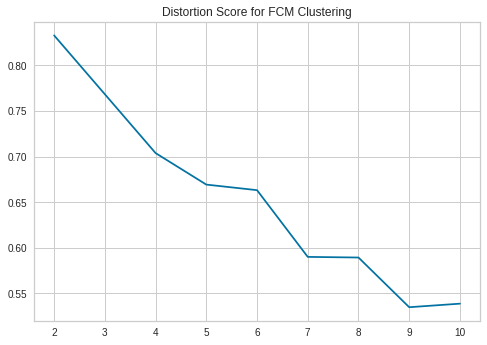

In [29]:
clasters = []
for k in range(2,11):
    fcm = FCM(n_clusters=k, random_state=100)
    fcm.fit(np.array(datasetWithoutClasterLabels))
    print(f"Оценка методом плеча работу алгоритма fcm: количество кластеров {k} = {silhouette_score(datasetWithoutClasterLabels, fcm.predict(np.array(datasetWithoutClasterLabels)))}")
    clasters.append(silhouette_score(datasetWithoutClasterLabels, 
                                     fcm.predict(np.array(datasetWithoutClasterLabels))))
plt.plot(range(2, 11), clasters)
plt.title("Distortion Score for FCM Clustering")

Итог: оптимальное число кластеров для fcm - 6

**Применение алгоритма DBSCAN**

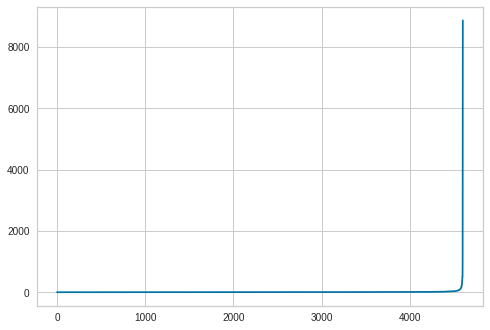

In [33]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(datasetWithoutClasterLabels)
distances, indices = nbrs.kneighbors(datasetWithoutClasterLabels)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [78]:
eps = 280
dbscan = DBSCAN(eps=eps).fit(datasetWithoutClasterLabels)


Метки, полученные в результате работы DBSCAN

In [79]:
for label in dbscan.labels_:
  print(label)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1
0
0
0
0
0
0
0
0
0
0
0
0
0
-1
0
0
0
0
0
0
0
0
0
0
-1
0
-1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


DBSCAN не требует в качестве параметра количества кластеров.Он сам определяет количество кластеров на основе данных.

Оценка методом плеча работу алгоритма dbscan: 0.9180009632960474


[Text(0.5, 1.0, 'Data T-SNE projection')]

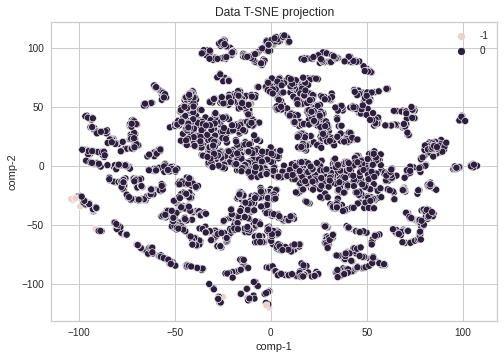

In [80]:
print(f"Оценка методом плеча работу алгоритма dbscan: {silhouette_score(datasetWithoutClasterLabels, dbscan.labels_)}")
df = pd.DataFrame()
df["y"] = dbscan.labels_
df["comp-1"] = tsne[:,0]
df["comp-2"] = tsne[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                data=df).set(title="Data T-SNE projection") 

Итог:  число кластеров для DBSCAN - 2, при значении эпсилон = 280. Стоит отметить, что один кластер является шумом

# **Вывод**

Для набора данных spambase лучшим алгоритмом кластеризации является fcm, так как он показывет лучшую оценку:

> k-means: 0.8475511103950265

> fcm: 0.8326625438689401

> dbscan: 0.9180009632960474

При увеличении числа кластеров алгоритм fcm также демонстирует лучшую оценку.
